# Exploratory Data Analysis

This section deals with exploring, understanding, and summarizing the 'Telco Customer Churn' dataset before modeling. 

This section aims to solve the following questions:
1. What does the data look like?
2. What patterns, relationships, or trends are present?
3. Are there any errors, missing values, or outliers?
4. What might influence the target variable (Churn)?

### 1. Importing the Libraries and Dataset

#### 1.1. Loading the libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### 1.2.  Importing the dataset

In [2]:
dataset = pd.read_csv('/Users/eseoseodion/Documents/Portfolio/Customer Churn Prediction/data/telco_customer_churn.csv')
dataset.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 2. Understanding the Structure of the Dataset

The following steps will be carried out in this sub-section:
- Check the rows and columns.
- Check the names and types of the columns.
- Check which columns are numericals and which are categoricals.

#### 2.1. Determining the shape of the dataset

In [3]:
# Determine the shape
dataset.shape

(7043, 21)

Key Observation: Dataset has 7043 rows and 21 columns

#### 2.2. Determining the names of the columns

In [4]:
# Check column names
print("Column names:", dataset.columns)

Column names: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Key Observation: The names of all 21 columns are: 
1. customerID
2. gender
3. SeniorCitizen
4. Partner
5. Dependents
6. tenure
7. PhoneService
8. MultipleLines
9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn

#### 2.3. Determining the data types of each column

In [5]:
# Check column data types
print("\nColumn data types:\n", dataset.dtypes)


Column data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Key Observations:
- Most columns are 'object':

- These contain categorical data like 'Yes', 'No', 'Male', 'Female', 'DSL', 'No internet service', etc.

 - Example: gender, PaymentMethod, Contract

- SeniorCitizen is 'int64':

 - It contains values like 0 and 1 — a numeric representation of binary categories (e.g., 0 = No, 1 = Yes).

- tenure is 'int64':

 - A numeric column representing how long the customer has been with the company (e.g., number of months).

- MonthlyCharges is 'float64':

 - A true numeric column with decimal values.

- TotalCharges is 'object' but should be numeric:

 - TotalCharges should likely be a float, but it's stored as object. That means:

 - There might be some missing or bad data (e.g., empty strings or spaces).
 - It needs to be cleaned and converted.

#### 2.4. Identifying the numerical and categorial columns

In [6]:
# Select numerical columns
numerical = dataset.select_dtypes(include=['number'])
print("Numerical columns:\n", numerical.columns)

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


Key Observation: There are 3 numerical columns. 

Numerical Columns (Before Transforming 'TotalCharges'):
1. SeniorCitizen
2. tenure
3. MonthlyCharges

In [7]:
# Select categorical columns
categorical = dataset.select_dtypes(include=['object'])
print("Categorical columns:\n", categorical.columns)

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


Key Observation: There are 18 categorical columns. 

Categorical Columns (Before Transforming Total Charges):
1. customerID
2. gender
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. OnlineBackup
10. DeviceProtection
11. TechSupport
12. StreamingTV
13. StreamingMovies
14. Contract
15. PaperlessBilling
16. PaymentMethod
17. TotalCharges
18. Churn

#### 2.5. Converting 'TotalCharges' to numeric form

In [8]:
# Convert TotalCharges to numeric, coercing errors
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

print("The data type of 'TotalCharges: ", dataset['TotalCharges'].dtypes)

The data type of 'TotalCharges:  float64


In [9]:
numerical = dataset.select_dtypes(include=['number']).columns
categorical = dataset.select_dtypes(include=['object']).columns

print("Numerical columns:\n", numerical)
print("\nCategorical columns:\n", categorical)

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


Key Observation: After transforming the 'TotalCharges' columns, there are now 4 numerical columns and 17 categorical columns.

Numerical Columns (After Transforming 'TotalCharges')
1. SeniorCitizen
2. tenure
3. MonthlyCharges
4. TotalCharges

Categorical Columns
1. customerID
2. gender
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. OnlineBackup
10. DeviceProtection
11. TechSupport
12. StreamingTV
13. StreamingMovies
14. Contract
15. PaperlessBilling
16. PaymentMethod
17. Churn

### 3. Analysing the Target Column

- The following steps will be carried out in this sub-section:
- Checking the distribution of Churn (Yes/No).
- Checking if the dataset is balanced or imbalanced.

#### 3.1. Determining the unique values of the target column

In [10]:
# Determine the unique values of the target column
print(f"Unique values in 'Churn':", dataset['Churn'].unique())

Unique values in 'Churn': ['No' 'Yes']


Key Observations:
The unique values in the target column are:

- "No" → The customer did not churn (they stayed with the company).
- "Yes" → The customer did churn (they left the company).
- This confirms that the we will be dealing with only two classes (a binary classification target). The task now is to predict whether a customer will churn (Yes) or not (No).

#### 3.2. Checking if the classes are balanced

In [ ]:
# Determine if the classes are balanced or unbalanced

value_count = dataset['Churn'].value_counts()

# Calculate the percentages
percentages = dataset['Churn'].value_counts(normalize=True) * 100

# Arrange data in a table 
churn_distribution_table = pd.DataFrame({
    'Label': value_count.index,
    'Count': value_count.values,
    'Percentage': percentages.values.round(1).astype(str) + '%'
})

# Display the table
print(churn_distribution_table)

  Label  Count Percentage
0    No   5174      73.5%
1   Yes   1869      26.5%


 Interpretation of Results:
- Total customers: 7043 customers
- 5174 customers did not churn ("No") -> which is about 73.5% of that did not churn
- 1869 customers did churn ("Yes") -> which is about 26.5% of customers that did churn

Key Observations:
- The classes are imbalanced — there are much more "No" than "Yes" responses.
- The imbalance isn't extreme, but it's something to be aware of in modeling.
- The models may favor the majority class ("No") if not handled properly.

Notes for later modelling stage:
- Use stratified sampling during train-test split to preserve class proportions.
- Apply resampling techniques (like SMOTE, RandomOverSampler, or undersampling).
- Choose appropriate evaluation metrics (precision, recall, F1-score).
- Possibly use models or algorithms that handle imbalance better (like class_weight='balanced' in logistic regression, decision trees, etc.).

#### 3.3. Visualising the 'Churn' class

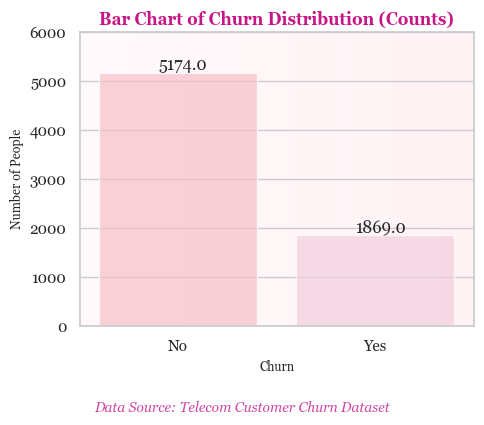

In [81]:
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

# Set theme and font
sns.set_theme(style="whitegrid", font="Georgia")  # Try "Comic Sans MS", "Arial Rounded", or "Georgia"

# Set soft pink colour palette
soft_pink_palette = ['#FFB6C1', '#F8C8DC']  # lightpink and pale blush
sns.set_palette(soft_pink_palette)

# Create the plot
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Churn', hue='Churn', data=dataset, palette=['#FFB6C1', '#F8C8DC'], alpha=0.7)


# Add soft gradient background
cmap = LinearSegmentedColormap.from_list('pink_grad', ['#FFE6F0', '#FFC0CB'])
ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
          extent=[-0.5, 1.5, 0, 6000], alpha=0.2, zorder=0)


# Title and lables 
plt.title('Bar Chart of Churn Distribution (Counts)', fontsize=12, fontweight='bold', color='#C71585')
plt.xlabel("Churn", fontsize=9)
plt.ylabel("Number of People", fontsize=9)


# Add values on the labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))
    

# Give the plot a clean finish
plt.figtext(0.5, -0.05, "Data Source: Telecom Customer Churn Dataset",
            ha="center", fontsize=10, style='italic', color='#D147A3')

plt.tight_layout()
plt.show()

Key Observation:
- This bar chart shows the raw count of customers who churned versus those who didn’t.
- We can clearly see that the "No" class (customers who did not churn) is significantly larger than the "Yes" class.
- This indicates an imbalance in the target variable, which is important to consider when building predictive models.

Summary: Most customers did not churn, showing a clear class imbalance in the dataset.

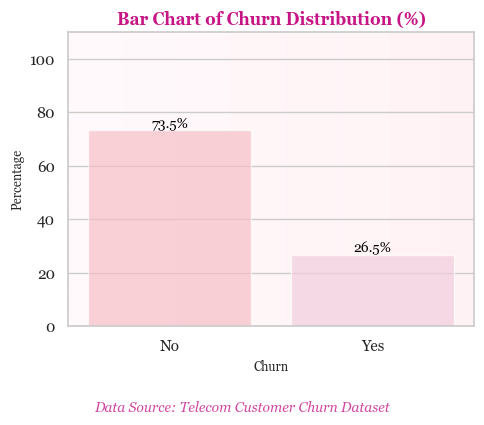

In [ ]:
# Calculate percentages manually
churn_pct = dataset['Churn'].value_counts(normalize=True) * 100

# Convert to DataFrame
churn_df = churn_pct.reset_index()
churn_df.columns = ['Churn', 'Percentage']

# Create the plot
plt.figure(figsize=(5, 4))
ax = sns.barplot(x='Churn', y='Percentage', hue='Churn', data=churn_df, palette=['#FFB6C1', '#F8C8DC'], alpha=0.7)

# Now ax exists, so you can add the gradient background:
cmap = LinearSegmentedColormap.from_list('pink_grad', ['#FFE6F0', '#FFC0CB'])
ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
          extent=[-0.5, 1.5, 0, 110], alpha=0.2, zorder=0)


# Title and lables 
plt.title('Bar Chart of Churn Distribution (%)', fontsize=12, fontweight='bold', color='#C71585')
plt.ylabel("Percentage", fontsize=9)
plt.xlabel("Churn", fontsize=9)

# Add percentage labels on bars
for i, row in churn_df.iterrows():
    plt.text(i, row['Percentage'] + 1, f"{row['Percentage']:.1f}%", ha='center', fontsize=10, color='black')

# Give it a clean finish
plt.figtext(0.5, -0.05, "Data Source: Telecom Customer Churn Dataset",
            ha="center", fontsize=10, style='italic', color='#D147A3')
plt.tight_layout()
plt.show()

Key Observations:
- When viewed in percentages, about 73% of customers did not churn, while only 27% did.
- This confirms the class imbalance more clearly and helps visualize the proportion of churn in the dataset.
- Representing values as percentages is especially helpful when comparing across groups or preparing for presentations.

Summary: Only 27% of customers churned, highlighting the need to address this imbalance during modeling.

### 4. Analysing the Categorical Columns

The following steps will be carried out in this sub-section:
1. Checking the unique values in each categorical column.
2. Checking for any weird typos or mixed types.

In [52]:
# Determine the unique values in each column
for col in dataset.columns:
    print(f"Unique values in '{col}':")
    print(dataset[col].unique())
    print('-' * 40)

Unique values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Unique values in 'gender':
['Female' 'Male']
----------------------------------------
Unique values in 'SeniorCitizen':
[0 1]
----------------------------------------
Unique values in 'Partner':
['Yes' 'No']
----------------------------------------
Unique values in 'Dependents':
['No' 'Yes']
----------------------------------------
Unique values in 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Unique values in 'PhoneService':
['No' 'Yes']
----------------------------------------
Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']
----------------------------------------
Unique values in 'Inter

Note: The full output can be viewed in the '01_eda_outputs.ipynb' file found in teh 'outputs' folder

In [13]:
# Define the feature matrix
X = dataset.iloc[:, 1:-1]

print(X.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

Notes: Justification for why I selected those features for the matrix of features.
- Explanation: 

In [14]:
# Defining the dependent variable vector
y = dataset.iloc[:, -1]

print(y.head())

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object


Notes: Justification for why the last column was selected as the dependent variable vector
- Explanation: 

### Checking for/Handling Missing Data

In [15]:
# Check for missing values
print(dataset.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
